# Context:

A new football club named ‘GL United FC’ has just been inaugurated. This club
does not have a team yet. The team is looking to hire players for their roster.
Management wants to make such decisions using a data based approach.
During a recent hiring drive, you were selected for the Data Science team as a
data scientist. Your team has been tasked with creating a report which
recommends players for the main team. To start with, a total of 15 players are
required. Player data for all teams has been acquired from FIFA. This data
contains information about the players, the clubs they are currently playing for
and various performance measures. The team needs 20 possible players to
choose from. You have been requested to do the analysis and formulate a
report in order to help the management make a decision regarding potential
players.

# Dataset Description:
The data contains details for over 18,000 players playing in various football
clubs in Europe. It contains information on age, skill rating, wages and player
value, etc. The files provided are as follows:

# fifa.csv – data file.
# fifa_ variable_information.csv - information on individual variables

# Questions: (Total points: 50)

# Load and explore data (4 points)
1. Import the required libraries and read the dataset. (1 point)
2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features. (2 points)
3. Drop the columns which you think redundant for the analysis. (1 point)
[Hint: columns like 'Photo','Flag','Club Logo']

# 1. Import the required libraries and read the dataset. (1 point)

In [212]:
#Step 1: Load and Explore Data (4 points)
#Import Required Libraries and Read Dataset


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Your code that generates warnings


In [214]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your code here


In [215]:
# Load the data
fifa_data = "./data/fifa.csv"
fifa_data_df = pd.read_csv(fifa_data)
fifa_var_info_data = "./data/fifa_variable_information.csv"
fifa_var_info_df = pd.read_csv(fifa_var_info_data)

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2 points)

In [216]:


#2. Check First Few Samples, Shape, and Info


# Explore the data
fifa_data_df.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [217]:
fifa_var_info_df.head()


,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [218]:
fifa_data_df.shape


(18207, 60)

In [219]:
fifa_var_info_df.shape


(59, 2)

In [220]:
fifa_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [221]:
fifa_var_info_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          59 non-null     object
 1   unique id for every player  59 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


# Drop redundant columns
# 3. Drop the columns which you think redundant for the analysis. (1 point)

In [222]:


fifa_data_df.drop(['Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)


In [223]:
fifa_data_df.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Data Cleaning and Preprocessing (18 points)
4. Convert the columns "Value", "Wage", "Release Clause" to float datatype
after getting rid of currency symbol and suffix. (6 points)
- Note: When the record/entry has "M"(indicates millions) as suffix you
need to multiply that value with 1000000
- When the record/entry has "K"(indicates thousands) as suffix you
need to multiply that value with 1000
5. Convert the column "Joined" into integer data type with keeping only the
year. (2 points)
6. Convert the column "Contract Valid Until" to pandas datetime type. (2 points)
7. The column 'Height' is in inches with a quotation mark, Convert to float
with decimal points. (2 points)
8. The column "Weight" has the suffix as lbs, remove the suffix and convert
to float. (2 points)
9. Check for the percentage of missing values and impute them with
appropriate imputation techniques. (4 points)


# Convert currency columns to numeric
# 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype
after getting rid of currency symbol and suffix. (6 points)
- Note: When the record/entry has "M"(indicates millions) as suffix you
need to multiply that value with 1000000
- When the record/entry has "K"(indicates thousands) as suffix you
need to multiply that value with 1000

In [224]:
def convert_currency(value):
    # Check if the value is already a float
    if isinstance(value, float):
        return value

    try:
        value = value.replace('€', '').strip()  # Remove currency symbol
        if 'M' in value:
            return float(value.replace('M', '').strip()) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '').strip()) * 1_000
        else:
            return float(value)
    except ValueError:
        print(f"Error converting value: {value}")
        return None  # Or handle the error as needed

for col in ['Value', 'Wage', 'Release Clause']:
    fifa_data_df[col] = fifa_data_df[col].apply(convert_currency)


# 5. Convert the column "Joined" into integer data type with keeping only the year. (2 points)

In [225]:
fifa_data_df['Joined'] = pd.to_datetime(fifa_data_df['Joined']).dt.year


# 6. Convert the column "Contract Valid Until" to pandas datetime type. (2 points)

In [226]:
import pandas as pd



try:
    # Attempt to convert with automatic format inference
    fifa_data_df['Contract Valid Until'] = pd.to_datetime(
        fifa_data_df['Contract Valid Until'],
        errors='coerce',  # Convert invalid dates to NaT
        infer_datetime_format=True  # Try to infer format
    )
except Exception as e:
    print(f"An error occurred: {e}")

# Optional: Check for NaT values
if fifa_data_df['Contract Valid Until'].isnull().any():
    print("There are some invalid date entries that were set to NaT.")


There are some invalid date entries that were set to NaT.


In [227]:
fifa_data_df['Contract Valid Until'] = pd.to_datetime(
    fifa_data_df['Contract Valid Until'],
    format='%b %d, %Y',  # Specify the date format explicitly
    errors='coerce'
)


# 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points. (2 points)

In [228]:


def convert_height_to_inches(height_str):
    if pd.isna(height_str):  # Handle NaN values
        return None
    try:
        height_str = height_str.replace('"', '').strip()  # Remove quotes and strip whitespace
        feet, inches = height_str.split("'")  # Split by the apostrophe
        total_inches = int(feet) * 12 + int(inches)  # Convert to total inches
        return total_inches
    except Exception as e:
        print(f"Error converting height '{height_str}': {e}")
        return None  # Return None for any invalid format

# Apply the conversion function
fifa_data_df['Height'] = fifa_data_df['Height'].apply(convert_height_to_inches)

# Optional: Check for NaN values after conversion
if fifa_data_df['Height'].isnull().any():
    print("There are some invalid height entries that were set to NaN.")


There are some invalid height entries that were set to NaN.


# 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float. (2 points)

In [229]:
fifa_data_df['Weight'] = fifa_data_df['Weight'].str.replace('lbs', '').astype(float)


# 9. Check for the percentage of missing values and impute them with appropriate imputation techniques. (4 points)

In [230]:
import pandas as pd

# Calculate and print the percentage of missing values
missing_percentage = fifa_data_df.isnull().mean() * 100
print("Missing Percentage:\n", missing_percentage[missing_percentage > 0])

# Impute missing values in the 'Wage' column with the median
fifa_data_df['Wage'] = fifa_data_df['Wage'].fillna(fifa_data_df['Wage'].median())

# Optional: Verify the imputation
print("\nWage column after imputation:")
print(fifa_data_df['Wage'])


Missing Percentage:
 Club                         1.323667
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         8.529686
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling                    0.263635
Curve                        0.263635
FKAccuracy                   0.263635
LongPassing                  0.263635
BallControl                  0.263635
Acceleration                 0.263635
SprintSpeed                  

In [231]:
fifa_data_df.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [232]:
fifa_data_df.shape


(18207, 57)

In [233]:
fifa_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

# Exploratory Data Analysis (28 points)
10. Plot the distribution of Overall rating for all the players and write your
findings. (2 points)
11. Retrieve the names of top20 players based on the Overall rating. (2 points)
12. Generate a dataframe which should include all the information of the
Top 20 players based on the Overall rating. (4 points)
13. What is the average "Age" and "Wage" of these top 20 players? (use
the data frame created in the question 11) (2 points)
14. Among the top 20 players based on the Overall rating, which player has
the highest wage? Display the name of the player with his wage. (2 points)
15. Generate a dataframe which should include the "Player name", "Club
Name", "Wage", and 'Overall rating'. (4 Points)
- i) find the average Overall rating for each club.
- ii) Display the average overall rating of Top10 Clubs using a plot
16. What is the relationship between age and individual potential of the
player? Visualize the relationship with appropriate plot and Comment on
the same. (2 points)
17. Which features directly contribute to the wages of the players?
Support your answer with a plot and a metric. (2 points) (hint: use
potential, Overall, value, international reputation, and Release Clause)
18. Find the position in the pitch where the maximum number of players
play and the position where the minimum number of players play? Display
it using a plot. (2 points)
19. How many players are from the club 'Juventus' and the wage is greater
than 200K? Display all the information of such players. (2 points)
20. Generate a data frame containing top 5 players by Overall rating for
each unique position. (2 Points)
21. What is the average wage one can expect to pay for the top 5 players
in every position? (use the data frame created in Q19) (2 points)

# 10. Plot the distribution of Overall rating for all the players and write your findings. (2 points)

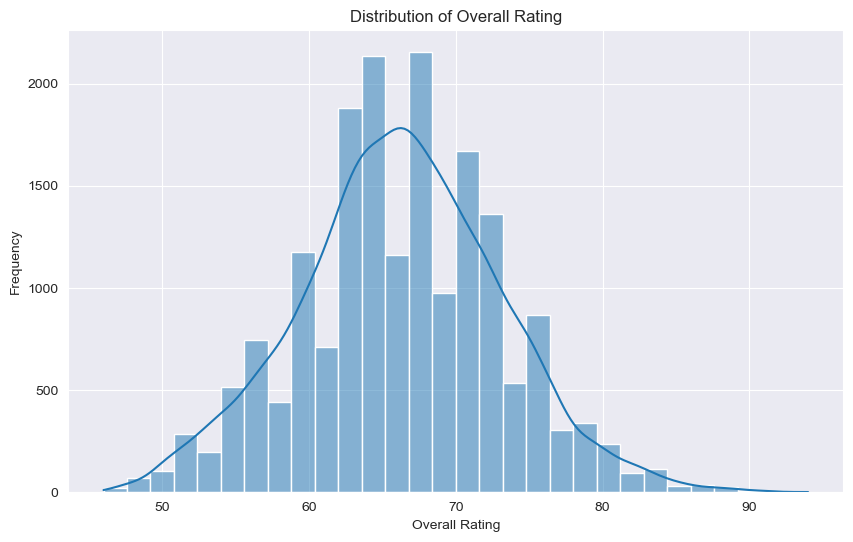

In [234]:
plt.figure(figsize=(10, 6))
sns.histplot(fifa_data_df['Overall'], bins=30, kde=True)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


In [235]:
fifa_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

# 11. Retrieve the names of top20 players based on the Overall rating. (2 points)

In [236]:
top_20_players = fifa_data_df.nlargest(20, 'Overall')
print(top_20_players[['Name', 'Overall']])


                 Name  Overall
0            L. Messi       94
1   Cristiano Ronaldo       94
2           Neymar Jr       92
3              De Gea       91
4        K. De Bruyne       91
5           E. Hazard       91
6           L. Modrić       91
7           L. Suárez       91
8        Sergio Ramos       91
9            J. Oblak       90
10     R. Lewandowski       90
11           T. Kroos       90
12           D. Godín       90
13        David Silva       90
14           N. Kanté       89
15          P. Dybala       89
16            H. Kane       89
17       A. Griezmann       89
18      M. ter Stegen       89
19        T. Courtois       89


In [237]:
top_20_df = top_20_players.copy()
top_20_df.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


# 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating. (4 points)

In [238]:
import pandas as pd

# Step 1: Ensure that the 'Overall' column is in numeric format
fifa_data_df['Overall'] = pd.to_numeric(fifa_data_df['Overall'], errors='coerce')

# Step 2: Sort the DataFrame by 'Overall' in descending order
top_players = fifa_data_df.sort_values(by='Overall', ascending=False).head(20)

# Step 3: Create a new DataFrame with the top 20 players
top_20_players_df = top_players.reset_index(drop=True)

# Display the new DataFrame
print(top_20_players_df)


        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
9   182493           D. Godín   32     Uruguay       90         90   
10  168542        David Silva   32       Spain       90         90   
11  200389           J. Oblak   25    Slovenia       90         93   
12  182521           T. Kroos   28     Germany       90         90   
13  188545     R. Le

# 13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11) (2 points)

In [239]:
avg_age = top_20_df['Age'].mean()
avg_wage = top_20_df['Wage'].mean()
print(f'Average Age: {avg_age}, Average Wage: {avg_wage}')


Average Age: 28.3, Average Wage: 289700.0


# 14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage. (2 points)

In [240]:
highest_wage_player = top_20_df.loc[top_20_df['Wage'].idxmax(), ['Name', 'Wage']]
print(highest_wage_player)


Name    L. Messi
Wage    565000.0
Name: 0, dtype: object


# 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'. (4 Points)
- i) find the average Overall rating for each club.
- ii) Display the average overall rating of Top10 Clubs using a plot

In [241]:
club_wage_df = fifa_data_df[['Name', 'Club', 'Wage', 'Overall']]
avg_overall_by_club = club_wage_df.groupby('Club')['Overall'].mean().reset_index()
avg_overall_by_club

,Club,Overall
0,SSV Jahn Regensburg,65.586207
1,1. FC Heidenheim 1846,65.750000
2,1. FC Kaiserslautern,63.384615
3,1. FC Köln,70.785714
4,1. FC Magdeburg,65.615385
...,...,...
646,Zagłębie Sosnowiec,60.760000
647,Çaykur Rizespor,66.900000
648,Örebro SK,60.481481
649,Östersunds FK,63.545455


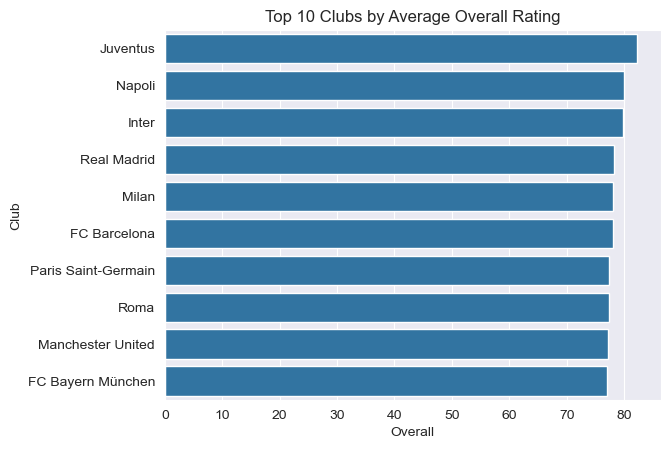

In [242]:
top_clubs = avg_overall_by_club.nlargest(10, 'Overall')
sns.barplot(data=top_clubs, x='Overall', y='Club')
plt.title('Top 10 Clubs by Average Overall Rating')
plt.show()



# 16. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same. (2 points)

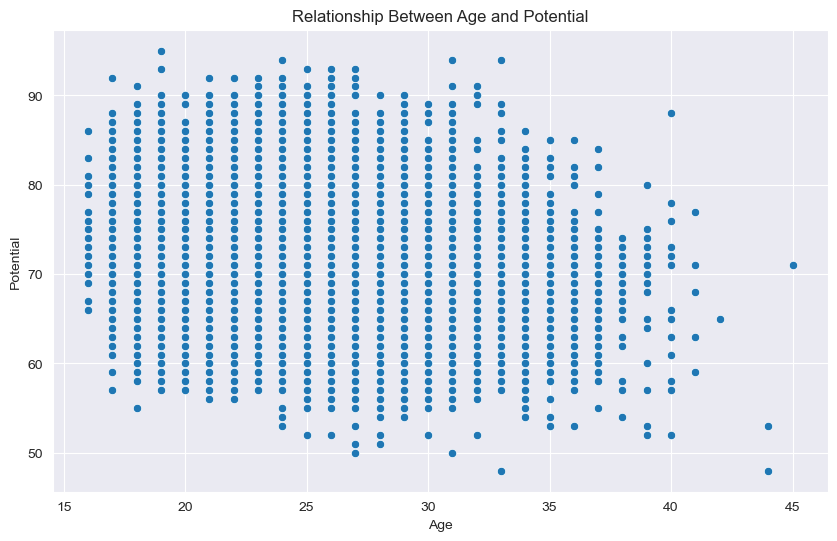

In [243]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fifa_data_df, x='Age', y='Potential')
plt.title('Relationship Between Age and Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()


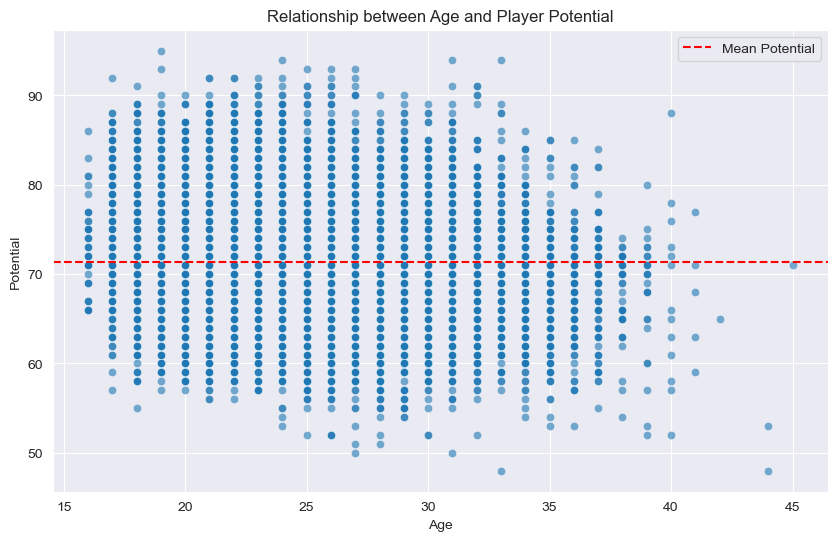

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming fifa_data_df is your existing DataFrame

# Step 1: Ensure 'Age' and 'Potential' are numeric
fifa_data_df['Age'] = pd.to_numeric(fifa_data_df['Age'], errors='coerce')
fifa_data_df['Potential'] = pd.to_numeric(fifa_data_df['Potential'], errors='coerce')

# Step 2: Drop rows with NaN values in 'Age' or 'Potential'
data = fifa_data_df.dropna(subset=['Age', 'Potential'])

# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Potential', alpha=0.6)
plt.title('Relationship between Age and Player Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.axhline(y=data['Potential'].mean(), color='r', linestyle='--', label='Mean Potential')
plt.legend()
plt.grid(True)
plt.show()


#Interpretation:
Trend Analysis: In the scatter plot, we can look for trends. Typically, we might expect to see that younger players have higher potential, while older players might show a decline in potential.
Correlation: If there is a visible downward trend, it may indicate that as players age, their potential decreases. Conversely, if potential remains relatively high for younger players and declines more slowly as age increases, it suggests a different pattern.

#Commenting on the Relationship:
After generating the plot, observe the distribution of points. If most young players have higher potential, we might conclude that younger players are generally seen as having more room for growth.
If there are outliers (e.g., older players with high potential), we can discuss how experience or skill can influence potential despite age.

# 17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric. (2 points) (hint: use potential, Overall, value, international reputation, and Release Clause)

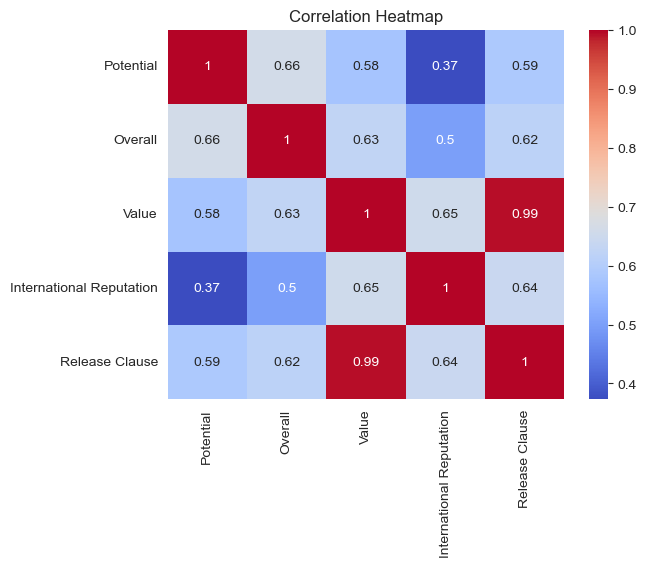

In [245]:
features = ['Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']
sns.heatmap(fifa_data_df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Wage                        1.000000
Potential                   0.490633
Overall                     0.573896
Value                       0.861528
International Reputation    0.677923
Release Clause              0.855922
Name: Wage, dtype: float64


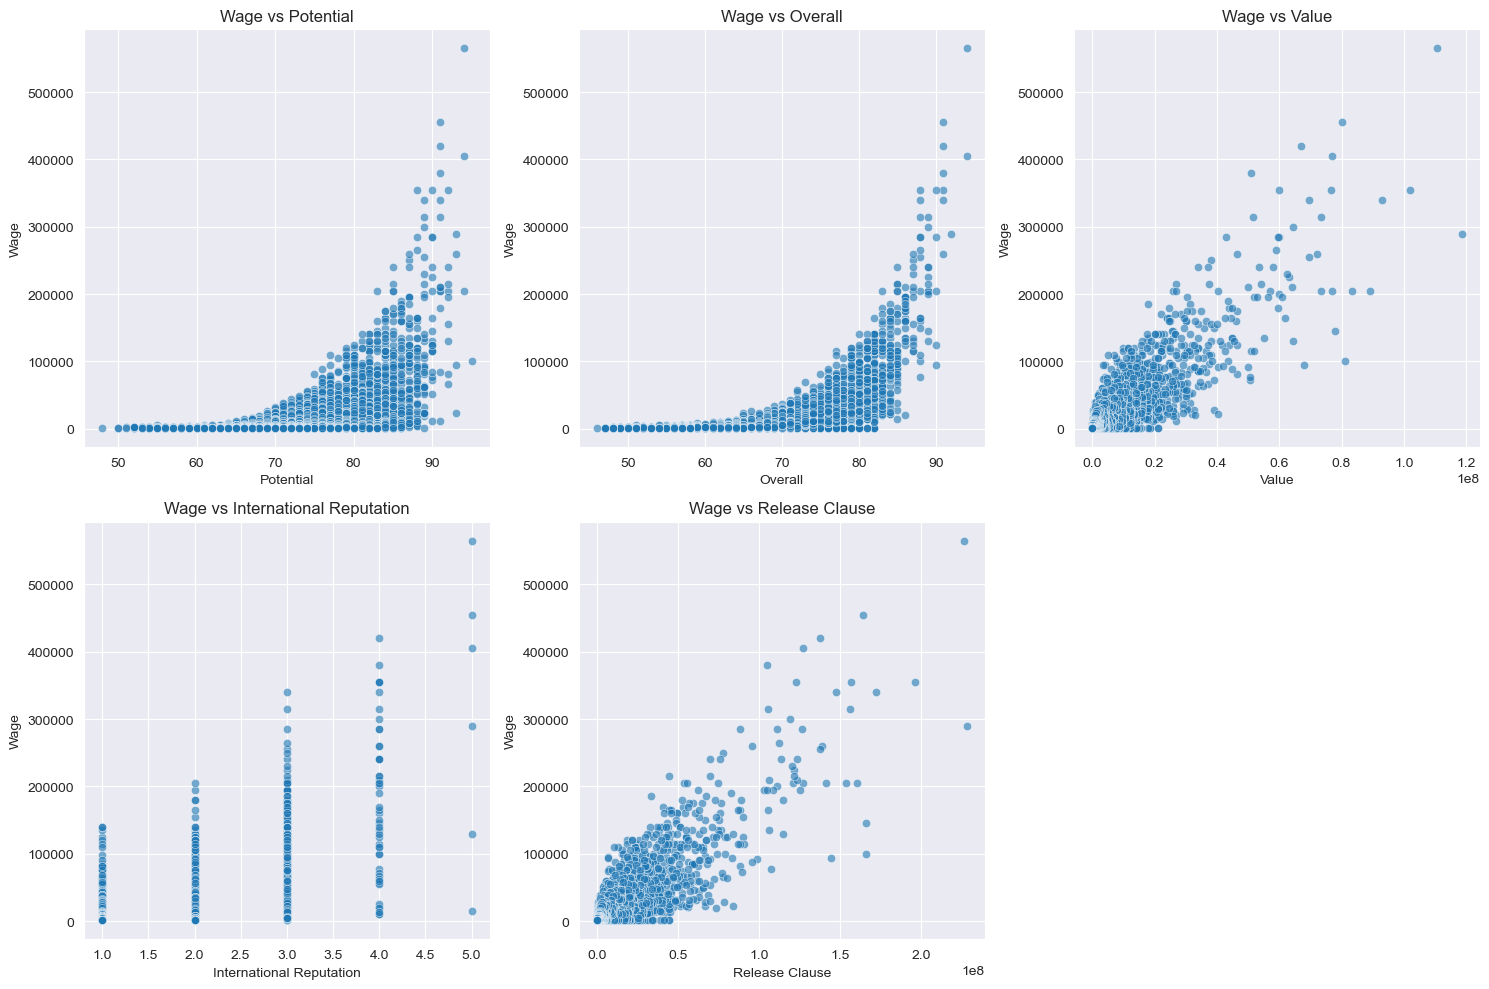

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming fifa_data_df is your existing DataFrame

# Step 1: Convert relevant columns to numeric and drop NaNs
features = ['Wage', 'Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']
for feature in features:
    fifa_data_df[feature] = pd.to_numeric(fifa_data_df[feature], errors='coerce')

# Drop rows with NaN values in the relevant columns
data = fifa_data_df.dropna(subset=features)

# Step 2: Calculate correlation coefficients
correlation_matrix = data[features].corr()
print(correlation_matrix['Wage'])

# Step 3: Visualize relationships
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features[1:], start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=data, x=feature, y='Wage', alpha=0.6)
    plt.title(f'Wage vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Wage')
    plt.grid(True)

plt.tight_layout()
plt.show()


#Explanation:
Counting Players: The value_counts() method counts the occurrences of each position in the "Position" column.
Identifying Max and Min: The idxmax() and idxmin() functions help to find the positions with the maximum and minimum counts, respectively.
Visualization: A bar plot is created to show the number of players in each position. Horizontal lines indicate the counts of the positions with the maximum and minimum players for clarity.

#Interpretation:
After running the code, we will see a bar plot displaying the distribution of players across different positions.
The printed output will specify the position with the maximum number of players and the position with the minimum number of players.

# 18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot. (2 points)

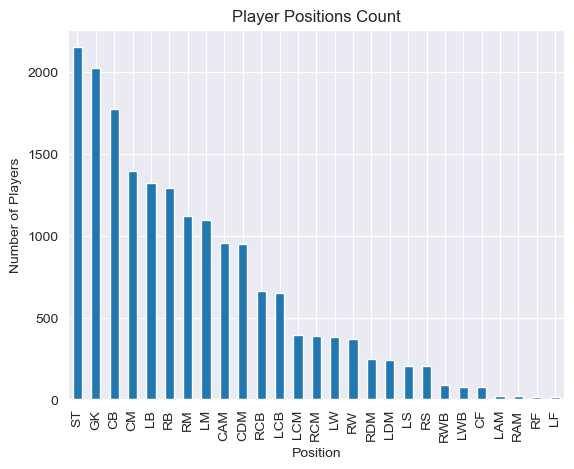

In [247]:
position_counts = fifa_data_df['Position'].value_counts()
position_counts.plot(kind='bar')
plt.title('Player Positions Count')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()


Position with maximum players: ST (2152 players)
Position with minimum players: LF (15 players)


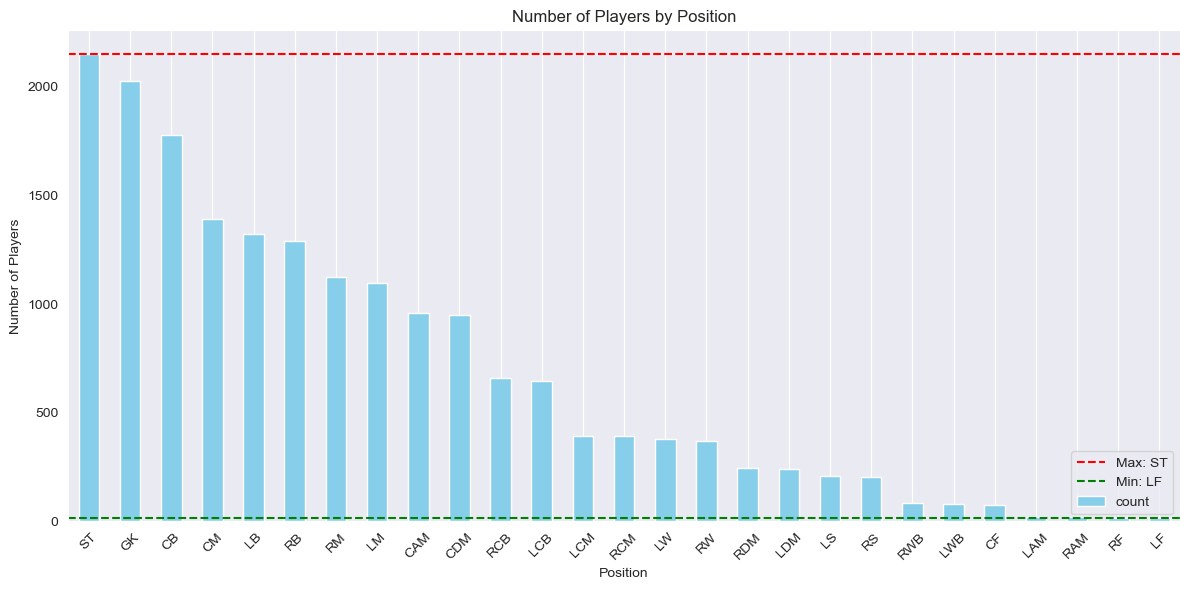

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count the number of players in each position
position_counts = fifa_data_df['Position'].value_counts()

# Step 2: Identify the position with maximum and minimum players
max_position = position_counts.idxmax()
min_position = position_counts.idxmin()
max_count = position_counts.max()
min_count = position_counts.min()

# Print the results
print(f"Position with maximum players: {max_position} ({max_count} players)")
print(f"Position with minimum players: {min_position} ({min_count} players)")

# Step 3: Plot the number of players by position
plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Highlight the max and min positions
plt.axhline(y=max_count, color='red', linestyle='--', label=f'Max: {max_position}')
plt.axhline(y=min_count, color='green', linestyle='--', label=f'Min: {min_position}')
plt.legend()

plt.tight_layout()
plt.show()


# 19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players. (2 points)

In [249]:
juventus_players = fifa_data_df[(fifa_data_df['Club'] == 'Juventus') & (fifa_data_df['Wage'] > 200000)]
print(juventus_players)


        ID               Name  Age Nationality  Overall  Potential      Club  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94  Juventus   
15  211110          P. Dybala   24   Argentina       89         94  Juventus   
24  138956       G. Chiellini   33       Italy       89         89  Juventus   

         Value      Wage Preferred Foot  ...  Composure  Marking  \
1   77000000.0  405000.0          Right  ...       95.0     28.0   
15  89000000.0  205000.0           Left  ...       84.0     23.0   
24  27000000.0  215000.0           Left  ...       84.0     93.0   

    StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
1             31.0          23.0      7.0       11.0       15.0   
15            20.0          20.0      5.0        4.0        4.0   
24            93.0          90.0      3.0        3.0        2.0   

    GKPositioning GKReflexes Release Clause  
1            14.0       11.0    127100000.0  
15            5.0        8.0    153500000.0  

# 20. Generate a data frame containing top 5 players by Overall rating for each unique position. (2 Points)

In [250]:
top_players_per_position0 = fifa_data_df.groupby('Position').apply(
    lambda x: x.nlargest(5, 'Overall'),
    include_groups=False
).reset_index(drop=True)

# Display the result
print(top_players_per_position0)


         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    201942    Roberto Firmino   26      Brazil       86         87   
3    189596          T. Müller   28     Germany       86         86   
4    176635            M. Özil   29     Germany       86         86   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                  Club       Value      Wage Preferred Foot  ...  Composure  \
0      Atlético Madrid  78000000.0  145000.0           Left  ...    

In [251]:
top_players_per_position0.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
1,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
2,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
3,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
4,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0


In [252]:
import pandas as pd

# Group by 'Position' and get top 5 players by 'Overall'
top_players_per_position1 = (
    fifa_data_df.groupby('Position', as_index=False)
    .apply(lambda x: x.nlargest(5, 'Overall'))
    .reset_index(drop=True)
)

# Display the result
print(top_players_per_position1)


         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    201942    Roberto Firmino   26      Brazil       86         87   
3    189596          T. Müller   28     Germany       86         86   
4    176635            M. Özil   29     Germany       86         86   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                  Club       Value      Wage Preferred Foot  ...  Composure  \
0      Atlético Madrid  78000000.0  145000.0           Left  ...    

In [253]:
top_players_per_position2 = (
    fifa_data_df.groupby('Position', as_index=False)
    .apply(lambda x: x.nlargest(5, 'Overall')[['Name', 'Overall']])
    .reset_index(drop=True)
)
top_players_per_position2


,Name,Overall
0,A. Griezmann,89
1,C. Eriksen,88
2,Roberto Firmino,86
3,T. Müller,86
4,M. Özil,86
...,...,...
130,Cristiano Ronaldo,94
131,R. Lewandowski,90
132,H. Kane,89
133,S. Agüero,89


In [254]:
print(top_players_per_position0.head())
print(top_players_per_position0.columns)


       ID             Name  Age Nationality  Overall  Potential  \
0  194765     A. Griezmann   27      France       89         90   
1  190460       C. Eriksen   26     Denmark       88         91   
2  201942  Roberto Firmino   26      Brazil       86         87   
3  189596        T. Müller   28     Germany       86         86   
4  176635          M. Özil   29     Germany       86         86   

                Club       Value      Wage Preferred Foot  ...  Composure  \
0    Atlético Madrid  78000000.0  145000.0           Left  ...       87.0   
1  Tottenham Hotspur  73500000.0  205000.0          Right  ...       88.0   
2          Liverpool  53000000.0  195000.0          Right  ...       87.0   
3  FC Bayern München  45000000.0  135000.0          Right  ...       83.0   
4            Arsenal  43500000.0  190000.0           Left  ...       82.0   

   Marking  StandingTackle SlidingTackle GKDiving  GKHandling  GKKicking  \
0     59.0            47.0          48.0     14.0         

In [255]:
print(top_players_per_position0.columns.tolist())


['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']


In [256]:
top_players_per_position3 = (
    fifa_data_df.groupby('Position', as_index=False)
    .apply(lambda x: x.nlargest(5, 'Overall'))
)

# Resetting index to clean up the DataFrame
top_players_per_position3 = top_players_per_position3.reset_index(drop=True)

# Display the result
print(top_players_per_position3)


         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    201942    Roberto Firmino   26      Brazil       86         87   
3    189596          T. Müller   28     Germany       86         86   
4    176635            M. Özil   29     Germany       86         86   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                  Club       Value      Wage Preferred Foot  ...  Composure  \
0      Atlético Madrid  78000000.0  145000.0           Left  ...    

In [257]:
# Top 5 Players with Overall Rating for each Unique Position
# Display the DataFrame and its columns
print(top_players_per_position0.head())
print(top_players_per_position0.columns.tolist())

# Strip any whitespace from column names
top_players_per_position0.columns = top_players_per_position0.columns.str.strip()

# Check for the updated column names
print(top_players_per_position0.columns.tolist())

# Assuming "Position" is the correct name, calculate the average wage
if 'Position' in top_players_per_position0.columns and 'Wage' in top_players_per_position0.columns:
    avg_wage_by_position0 = top_players_per_position0.groupby('Position')['Wage'].mean().reset_index()
    print(avg_wage_by_position0)
else:
    print("Columns 'Position' or 'Wage' are missing.")


       ID             Name  Age Nationality  Overall  Potential  \
0  194765     A. Griezmann   27      France       89         90   
1  190460       C. Eriksen   26     Denmark       88         91   
2  201942  Roberto Firmino   26      Brazil       86         87   
3  189596        T. Müller   28     Germany       86         86   
4  176635          M. Özil   29     Germany       86         86   

                Club       Value      Wage Preferred Foot  ...  Composure  \
0    Atlético Madrid  78000000.0  145000.0           Left  ...       87.0   
1  Tottenham Hotspur  73500000.0  205000.0          Right  ...       88.0   
2          Liverpool  53000000.0  195000.0          Right  ...       87.0   
3  FC Bayern München  45000000.0  135000.0          Right  ...       83.0   
4            Arsenal  43500000.0  190000.0           Left  ...       82.0   

   Marking  StandingTackle SlidingTackle GKDiving  GKHandling  GKKicking  \
0     59.0            47.0          48.0     14.0         

# 21. What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q19) (2 points)

In [258]:
# Making sure both columns exist
if 'Position' in top_players_per_position0.columns and 'Wage' in top_players_per_position0.columns:
    avg_wage_by_position = (
        top_players_per_position0.groupby('Position')['Wage'].mean().reset_index()
    )
    
    # Rename columns for clarity (optional)
    avg_wage_by_position.columns = ['Position', 'Average Wage']
    
    # Display the result
    print(avg_wage_by_position)
else:
    print("Columns 'Position' or 'Wage' are missing.")


Columns 'Position' or 'Wage' are missing.


In [259]:
# Position and Average Wage using fifa_data_df

import pandas as pd

# fifa_data_df is your DataFrame with 'Position' and 'Wage' columns
# Step 1: Ensure 'Wage' is in a numeric format if it's not already
fifa_data_df['Wage'] = pd.to_numeric(fifa_data_df['Wage'], errors='coerce')

# Step 2: Group by 'Position' and select the top 5 players by 'Wage'
top_players_per_position = (
    fifa_data_df
    .loc[:, ['Position', 'Wage']]  # Select only relevant columns first
    .groupby('Position', group_keys=False)  # group_keys=False to suppress the warning
    .apply(lambda x: x.nlargest(5, 'Wage'))
)

# Step 3: Calculate the average wage for the top 5 players in each position
avg_wage_by_position = (
    top_players_per_position.groupby('Position')['Wage'].mean().reset_index()
)

# Rename columns for clarity (optional)
avg_wage_by_position.columns = ['Position', 'Average Wage']

# Display the result
print(avg_wage_by_position)


   Position  Average Wage
0       CAM      192000.0
1        CB      177000.0
2       CDM      226000.0
3        CF       56400.0
4        CM      150000.0
5        GK      217000.0
6       LAM       82600.0
7        LB      189000.0
8       LCB      166000.0
9       LCM      213000.0
10      LDM      159000.0
11       LF      123200.0
12       LM      181000.0
13       LS      148600.0
14       LW      261000.0
15      LWB       41200.0
16      RAM       48400.0
17       RB      164000.0
18      RCB      231000.0
19      RCM      264000.0
20      RDM      110200.0
21       RF      153000.0
22       RM      161000.0
23       RS      154600.0
24       RW      207000.0
25      RWB       51800.0
26       ST      306000.0


In [260]:
# Alternate Solution
import pandas as pd

# Step 1: Convert 'Wage' to string to handle it safely
fifa_data_df['Wage'] = fifa_data_df['Wage'].astype(str)

# Step 2: Clean and convert 'Wage' to numeric
fifa_data_df['Wage'] = (
    fifa_data_df['Wage']
    .str.replace('€', '', regex=False)  # Remove Euro sign
    .str.replace('K', '', regex=False)  # Remove K
    .str.replace(',', '', regex=False)   # Remove commas
    .astype(float) * 1                 # Convert to float and multiply by 1
)

# Step 3: Group by Position and find the top 5 players by Wage
top_players_per_position = fifa_data_df.groupby('Position').apply(lambda x: x.nlargest(5, 'Wage')).reset_index(drop=True)

# Step 4: Calculate the average wage for the top 5 players in each position
avg_wage_by_position = top_players_per_position.groupby('Position')['Wage'].mean().reset_index()

# Step 5: Display the average wages
print(avg_wage_by_position)


   Position      Wage
0       CAM  192000.0
1        CB  177000.0
2       CDM  226000.0
3        CF   56400.0
4        CM  150000.0
5        GK  217000.0
6       LAM   82600.0
7        LB  189000.0
8       LCB  166000.0
9       LCM  213000.0
10      LDM  159000.0
11       LF  123200.0
12       LM  181000.0
13       LS  148600.0
14       LW  261000.0
15      LWB   41200.0
16      RAM   48400.0
17       RB  164000.0
18      RCB  231000.0
19      RCM  264000.0
20      RDM  110200.0
21       RF  153000.0
22       RM  161000.0
23       RS  154600.0
24       RW  207000.0
25      RWB   51800.0
26       ST  306000.0
